<a href="https://colab.research.google.com/github/itsaniketrathod/Capstone-Project-EDA/blob/main/AirBnB_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<p align="center"> <img src = 'https://drive.google.com/uc?id=13R8JHaYzk_08rP9Xa8HlHS9uTqAu08G7' width="350" height="250"> </p>


# **Exploratory Data Analysis on AirBnB Booking**

#### **Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services, and much more.**

#### **This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values**

# **Importing Libraries and Loading Dataset**

#### **Importing Libraries**

In [ ]:
!pip install seaborn --upgrade

In [5]:
# Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import plotly.express as px
%matplotlib inline

In [83]:
import warnings
from pandas.core.common import SettingWithCopyWarning

warnings.filterwarnings("ignore",category=UserWarning)
warnings.filterwarnings("ignore",category=SettingWithCopyWarning)

#### **Mounting Drive**

In [6]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### **Importing Dataset & Conducting Some Basic Analysis**

In [7]:
# Importing the dataset
airbnb_df = pd.read_csv('/content/drive/My Drive/Capstone Projects/Airbnb NYC 2019.csv')

In [8]:
airbnb_df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [9]:
airbnb_df.tail()

id                                               name   host_id  \
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
48890         NaN                NaN                               2   
48891         NaN                NaN                               2   
48892         NaN                NaN                               1   
48893         NaN                NaN                               6   
48894         NaN                NaN                               1   

       availability_365  
48890                 9  
48891                36  
48892                27  
48893                 2  
48894                23

In [10]:
# Information of the dataframe with features we will be using
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [11]:
# Shape of the dataframe
airbnb_df.shape

(48895, 16)

In [12]:
# Columns in the Dataframe
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

# **Data Cleaning and Preprocessing**

#### **Handling Missing Values**

In [13]:
# Columns with NaN values
airbnb_df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

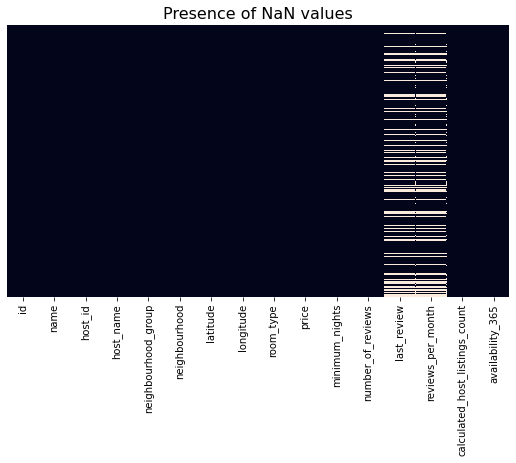

In [14]:
# Representing NaN values in heatmap
plt.figure(figsize=(9,5))
sns.heatmap(airbnb_df.isnull(),yticklabels=False,cbar=False)
plt.title("Presence of NaN values", size=16)
plt.show()

In [15]:
# Representing NaN values in tabular form
missing_values_df=(pd.DataFrame(airbnb_df.isna().sum())).reset_index()
missing_values_df.drop([4,5,6,7,8],axis=0,inplace=True)
missing_values_df.rename(columns={'index':"Column Name",0:'NaN Values'},inplace=True)
missing_values_df

Column Name  NaN Values
0                               id           0
1                             name          16
2                          host_id           0
3                        host_name          21
9                            price           0
10                  minimum_nights           0
11               number_of_reviews           0
12                     last_review       10052
13               reviews_per_month       10052
14  calculated_host_listings_count           0
15                availability_365           0

#### **Replacing The NaN Values**

In [16]:
# Filling the NaN values
airbnb_df['name'].fillna('Unavailable',inplace= True)
airbnb_df['host_name'].fillna('Unavailable',inplace= True)
airbnb_df['last_review'].fillna('2019-12-31',inplace = True)
airbnb_df['reviews_per_month'].fillna(0.0, inplace = True)

In [17]:
# Correcting date format in 'last_review' column
airbnb_df['last_review'] = pd.to_datetime(airbnb_df['last_review'])

In [18]:
# Checking NaN values
airbnb_df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

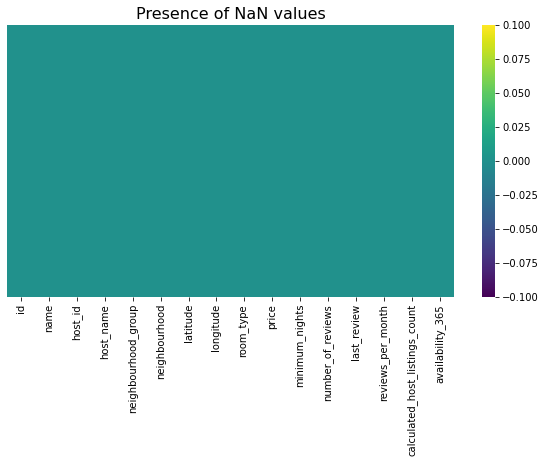

In [19]:
# Representing NaN values in heatmap
plt.figure(figsize=(10,5))
sns.heatmap(airbnb_df.isnull(),yticklabels=False,cmap='viridis')
plt.title("Presence of NaN values", size=16)
plt.show()

# **Data Visualization**

### **Top Neighbourhood Group**

In [20]:
# Top Neighbourhood Group
top_neighbourhood_group = pd.DataFrame(airbnb_df['neighbourhood_group'].value_counts().reset_index())
top_neighbourhood_group.rename(columns={'index':"Neighbourhood Group","neighbourhood_group":'Total Listings'},inplace=True)

In [21]:
top_neighbourhood_group

Neighbourhood Group  Total Listings
0           Manhattan           21661
1            Brooklyn           20104
2              Queens            5666
3               Bronx            1091
4       Staten Island             373

<function matplotlib.pyplot.show(*args, **kw)>

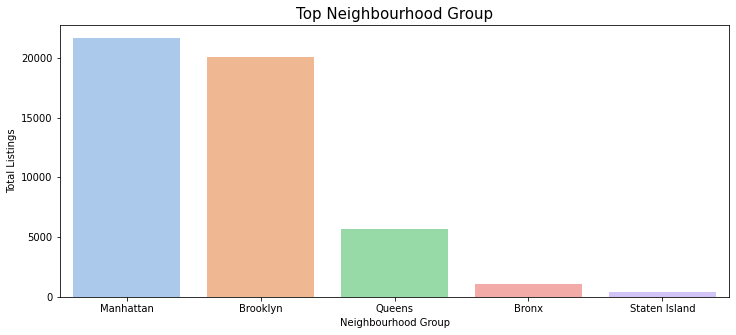

In [22]:
plt.figure(figsize=(12,5))
sns.barplot(x='Neighbourhood Group',y='Total Listings',data=top_neighbourhood_group,palette='pastel')
plt.title("Top Neighbourhood Group",fontsize=15, fontweight=0, color='black', loc='center', style='normal')
plt.xlabel("Neighbourhood Group")
plt.ylabel("Total Listings")
plt.show

▶ In terms of listings, Manhattan is the most popular neighbourhood borough, followed by Brooklyn and Queens.

### **Top 10 neighbourhood**

In [23]:
# Top 10 neighbourhood

top_ten_neighbourhood = pd.DataFrame(airbnb_df['neighbourhood'].value_counts().reset_index()[:10])
top_ten_neighbourhood.rename(columns={'index':"Neighbourhood","neighbourhood":'Total Listings'},inplace=True)

In [24]:
top_ten_neighbourhood

Neighbourhood  Total Listings
0        Williamsburg            3920
1  Bedford-Stuyvesant            3714
2              Harlem            2658
3            Bushwick            2465
4     Upper West Side            1971
5      Hell's Kitchen            1958
6        East Village            1853
7     Upper East Side            1798
8       Crown Heights            1564
9             Midtown            1545

<function matplotlib.pyplot.show(*args, **kw)>

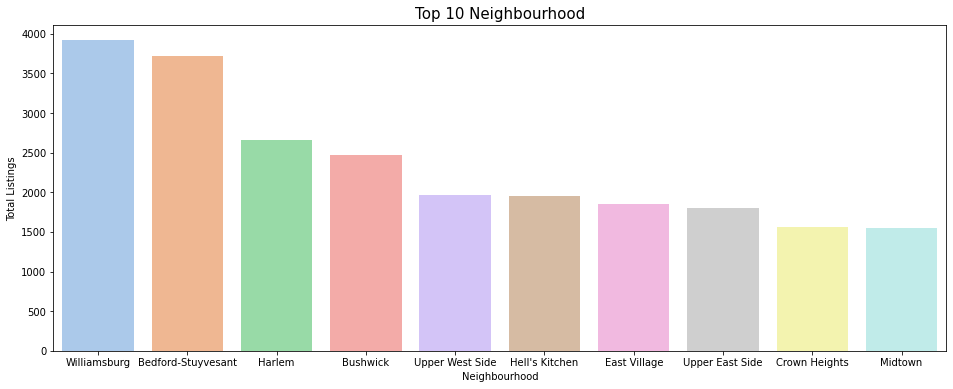

In [25]:
plt.figure(figsize=(16,6))
sns.barplot(x='Neighbourhood',y='Total Listings',data=top_ten_neighbourhood,palette='pastel')
plt.title("Top 10 Neighbourhood",fontsize=15, fontweight=0, color='black', loc='center', style='normal')
plt.xlabel("Neighbourhood")
plt.ylabel("Total Listings")
plt.show

▶ Williamsburg (Brooklyn), Bedford-Stuyvesant (Brooklyn), and Harlem (Manhattan) are the three most popular neighbourhoods in terms of listings.

### **Analyzing Room Types**


##### **Popular Room Types**

In [26]:
most_booked_room_type = pd.DataFrame(airbnb_df['room_type'].value_counts().reset_index()[:10])
most_booked_room_type.rename(columns={'index':"Room Type","room_type":'Popularity'},inplace=True)

In [27]:
most_booked_room_type

Room Type  Popularity
0  Entire home/apt       25409
1     Private room       22326
2      Shared room        1160

<function matplotlib.pyplot.show(*args, **kw)>

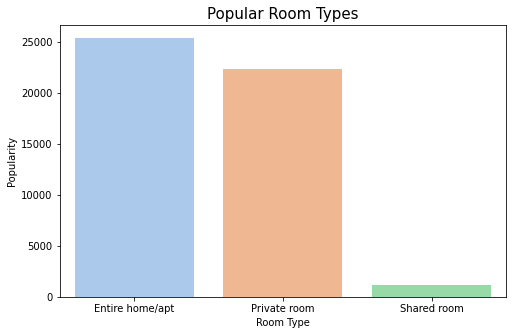

In [28]:
# Plotting Popular Room Types(Barplot)
plt.figure(figsize=(8,5))
sns.barplot(x='Room Type',y='Popularity',data=most_booked_room_type,palette='pastel')
plt.title("Popular Room Types",fontsize=15, fontweight=0, color='black', loc='center', style='normal')
plt.xlabel("Room Type")
plt.ylabel("Popularity")
plt.show

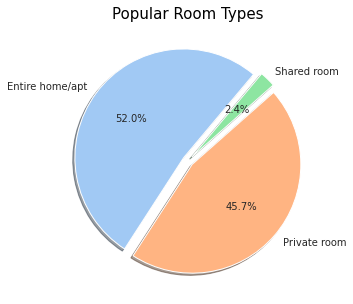

In [29]:
# Plotting Popular Room Types(Piechart)
sns.set_style('white')
plt.figure(figsize=(8,5))
colors = sns.color_palette('pastel')
plt.pie(data=most_booked_room_type,x='Popularity',labels='Room Type', autopct='%.01f%%',startangle=50 ,colors = colors,shadow = True,explode = (0.05, 0.05, 0.05))
plt.title("Popular Room Types",fontsize=15, fontweight=0, color='black', loc='center', style='normal')
plt.show()

▶ According to listings, "Entire Home/Apartment" is the most popular room type, making up 52% of listings, while "Shared rooms" only make up 2.4%.

##### **Room Type V Neighbourhood Group**

<function matplotlib.pyplot.show(*args, **kw)>

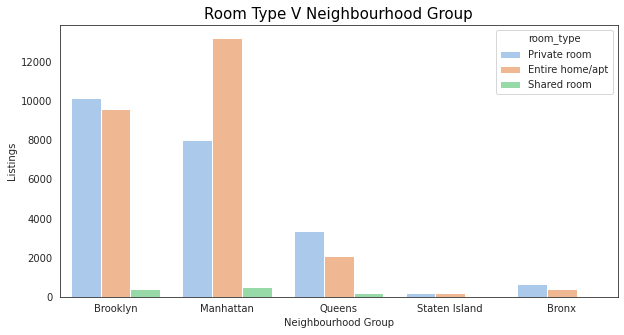

In [30]:
# Plotting Room Type V Neighbourhood Group
plt.figure(figsize=(10,5))
sns.countplot(data = airbnb_df, hue = 'room_type', x = 'neighbourhood_group',palette='pastel')
plt.title("Room Type V Neighbourhood Group",fontsize=15, fontweight=0, color='black', loc='center', style='normal')
plt.xlabel("Neighbourhood Group")
plt.ylabel("Listings")
plt.show

▶ Manhattan has the most listings for the "Entire Home/Apt" room type.

▶ Brooklyn has an almost equal number of listings for room types "Entire Home/Apt" and "Private Room"

▶ "Shared Room" has the fewest listings across all neighbourhoods.

##### **Neighbourhood Group V Room Type**

<function matplotlib.pyplot.show(*args, **kw)>

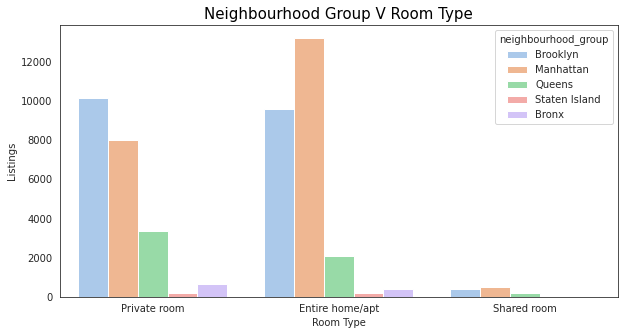

In [31]:
# Plotting Neighbourhood Group V Room Type
plt.figure(figsize=(10,5))
sns.countplot(data = airbnb_df, x = 'room_type', hue = 'neighbourhood_group',palette='pastel')
plt.title("Neighbourhood Group V Room Type",fontsize=15, fontweight=0, color='black', loc='center', style='normal')
plt.xlabel("Room Type")
plt.ylabel("Listings")
plt.show

In [32]:
# Inspecting Number of Reviews columns
airbnb_df.number_of_reviews.describe(percentiles=[.25, .5, .75,.95])

count    48895.000000
mean        23.274466
std         44.550582
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
95%        114.000000
max        629.000000
Name: number_of_reviews, dtype: float64

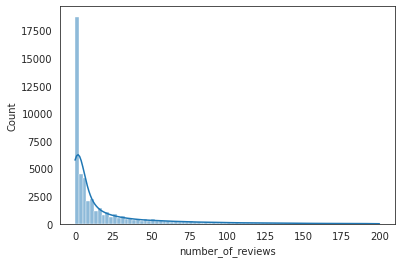

In [33]:
reviews_range = airbnb_df[airbnb_df['number_of_reviews'] <= 200]
sns.histplot(data=reviews_range, x="number_of_reviews", kde=True, bins = 80)

<Figure size 864x360 with 0 Axes>

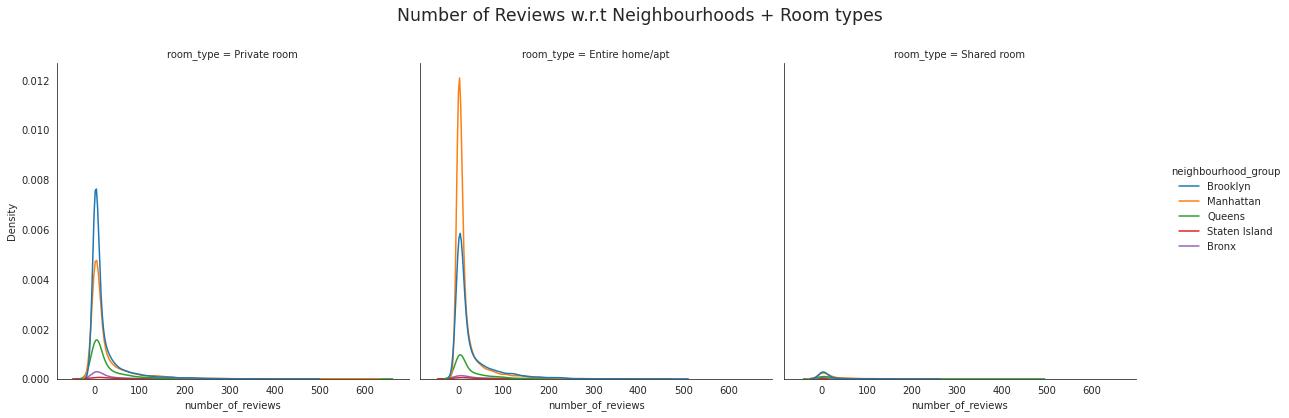

In [34]:
plt.figure(figsize=(12,5))
reviews = sns.displot(x='number_of_reviews',data=airbnb_df,col='room_type',hue='neighbourhood_group',kind='kde')
reviews.fig.subplots_adjust(top=.85)
reviews.fig.suptitle('Number of Reviews w.r.t Neighbourhoods + Room types',fontsize = 'xx-large',weight = 'medium')
reviews.fig.set_figwidth(18)
reviews.fig.set_figheight(6)

▶ Across all neighborhoods, properties listed as an entire house or apartment have received more reviews.

▶ Shared rooms have the fewest reviews, implying that they are the least popular type of room.  

### **Busiest Hosts**

In [35]:
busiest_hosts_top_ten =airbnb_df.groupby(['host_id','host_name','room_type'])['number_of_reviews'].max().reset_index().sort_values(by='number_of_reviews',ascending=False).head(10)
busiest_hosts_top_ten

host_id host_name        room_type  number_of_reviews
24497  47621202      Dona     Private room                629
7710    4734398        Jj     Private room                607
22225  37312959      Maya     Private room                543
4593    2369681     Carol     Private room                540
19453  26432133  Danielle     Private room                510
13714  12949460       Asa  Entire home/apt                488
1976     792159     Wanda     Private room                480
5059    2680820     Linda     Private room                474
161       42273      Dani  Entire home/apt                467
18297  23591164    Angela     Private room                466

<function matplotlib.pyplot.show(*args, **kw)>

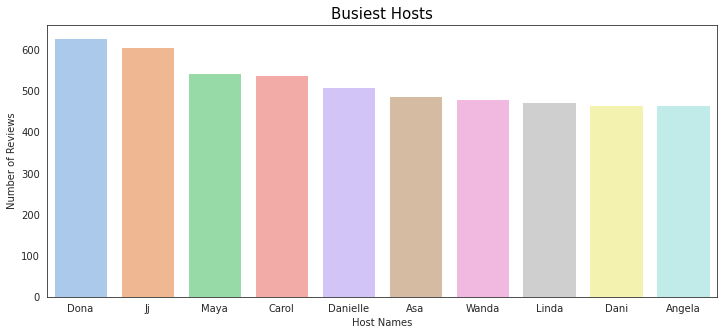

In [36]:
# Plotting Busiest Hosts
plt.figure(figsize=(12,5))
sns.barplot(data=busiest_hosts_top_ten,x='host_name',y='number_of_reviews',palette='pastel')
plt.title("Busiest Hosts",fontsize=15, fontweight=0, color='black', loc='center', style='normal')
plt.xlabel("Host Names")
plt.ylabel("Number of Reviews")
plt.show

### **Price Analysis in Neighbourhood Group**

In [37]:
airbnb_df.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [38]:
prices_in_neighbourhood_group = airbnb_df.groupby(['neighbourhood_group'])['price'].agg(['min', 'max','median','mean']).reset_index()
prices_in_neighbourhood_group

neighbourhood_group  min    max  median        mean
0               Bronx    0   2500    65.0   87.496792
1            Brooklyn    0  10000    90.0  124.383207
2           Manhattan    0  10000   150.0  196.875814
3              Queens   10  10000    75.0   99.517649
4       Staten Island   13   5000    75.0  114.812332

<function matplotlib.pyplot.show(*args, **kw)>

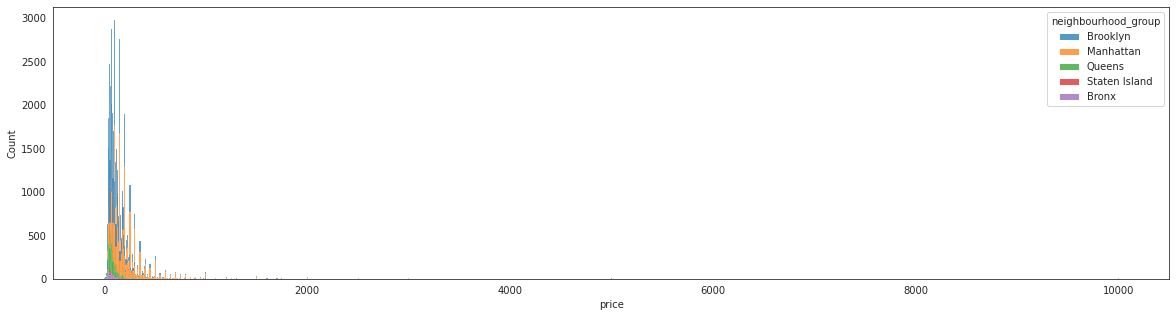

In [39]:
plt.figure(figsize=(20,5))
sns.histplot(data=airbnb_df, x="price",hue="neighbourhood_group", multiple="stack",shrink=2)
plt.show

▶ We can see from the data plot above that the majority of listings are priced under \$1,000\.

▶ Listings costing more than \$1,000\ must be extremely luxurious, or there may have been an input error.

▶ We can treat these records as outliers and remove them because they are skewing our data.

In [40]:
min_thresold, max_thresold = airbnb_df.price.quantile([0.01,0.995])
min_thresold, max_thresold

(30.0, 1000.0)

In [41]:
airbnb_df2 = airbnb_df[(airbnb_df.price>min_thresold)&(airbnb_df.price<max_thresold)]
airbnb_df2.shape

(47938, 16)

In [42]:
airbnb_df2.price.describe(percentiles=[.25, .5, .75,.95])

count    47938.000000
mean       141.806062
std        112.876602
min         31.000000
25%         70.000000
50%        109.000000
75%        175.000000
95%        350.000000
max        999.000000
Name: price, dtype: float64

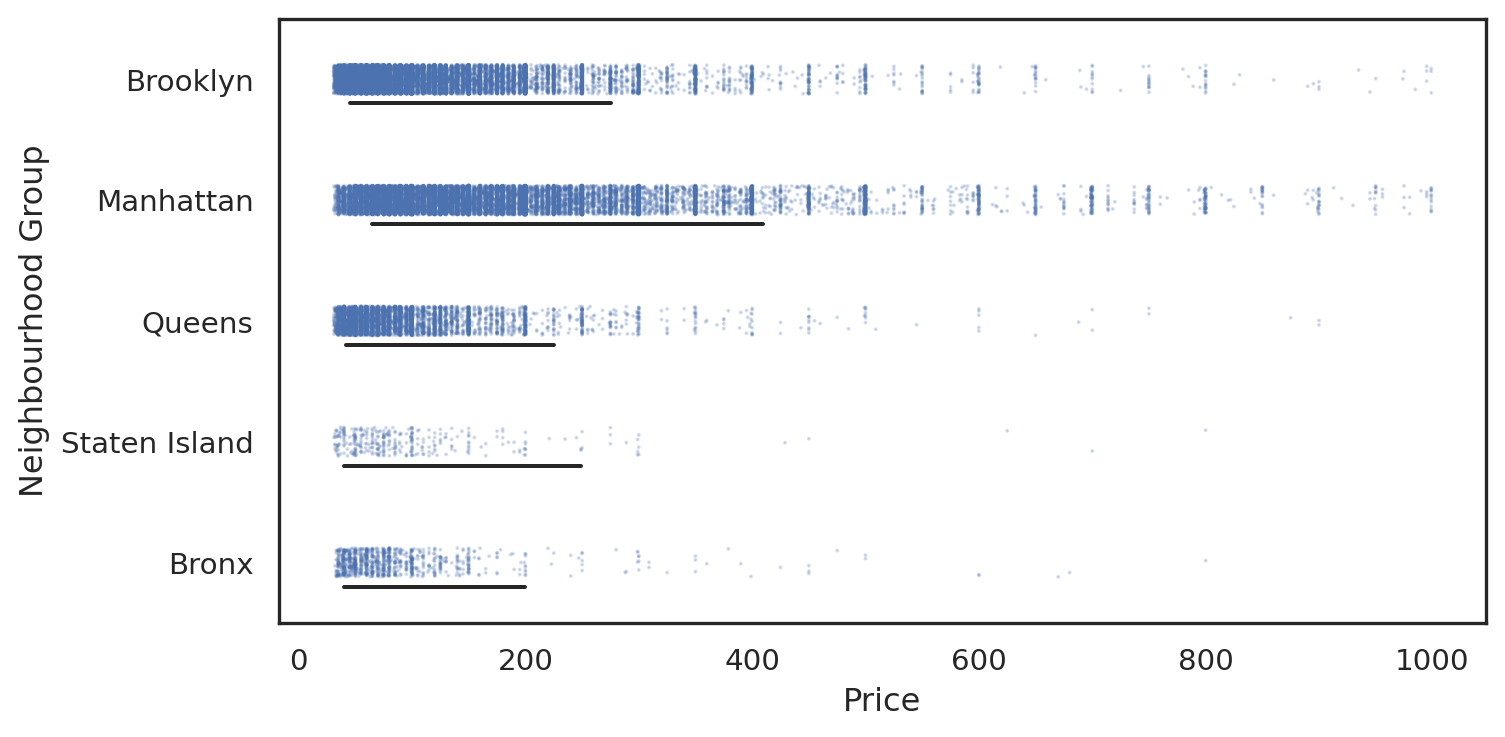

In [92]:
p = (
  so.Plot(airbnb_df2, x= "price", y="neighbourhood_group").layout(size=(8, 4))
    .add(so.Dots(pointsize=0.75, alpha=.2), so.Jitter(.3))
    .add(so.Range(color="k"), so.Perc([10,25,50,75,95]), so.Shift(y=.2))
)
p.theme({"axes.facecolor": "w", "axes.edgecolor": "k"}).label(x="Price", y="Neighbourhood Group", color="")

▶ Since 95% of the listings are priced less than 350, we can take 350 as a threshold for price

Text(0.5, 0, 'Neighbourhood Group')

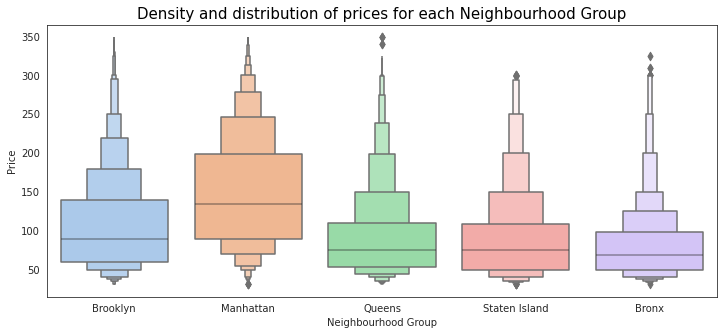

In [60]:
airbnb_df_updated_price = airbnb_df2[airbnb_df2['price'] < 350]
plt.figure(figsize=(12,5))
sns.boxenplot(x='neighbourhood_group', y='price', data= airbnb_df_updated_price , palette = 'pastel')
plt.title('Density and distribution of prices for each Neighbourhood Group',fontsize=15, fontweight=0, color='black', loc='center', style='normal')
plt.ylabel('Price')
plt.xlabel('Neighbourhood Group')

▶ Manhattan has the most costly and widest price range, followed by Brooklyn.

▶ Bronx has the most affordable listings of any borough.

Text(0.5, 0, 'Price')

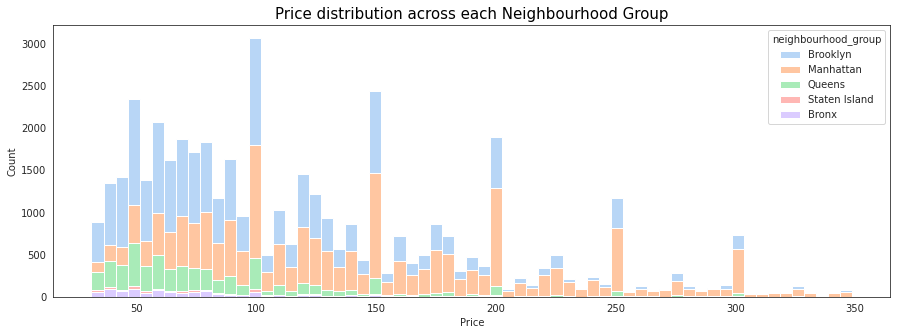

In [61]:
plt.figure(figsize=(15,5))
sns.histplot(data=airbnb_df_updated_price, x="price", hue="neighbourhood_group",multiple="stack",palette = 'pastel')
plt.title('Price distribution across each Neighbourhood Group',fontsize=15, fontweight=0, color='black', loc='center', style='normal')
plt.ylabel('Count')
plt.xlabel('Price')

### **Plotting the price distribution in the Neighbourhood Group on a Map**

In [113]:
fig = px.scatter_mapbox(airbnb_df_updated_price,
                        lon=airbnb_df_updated_price['longitude'],
                        lat=airbnb_df_updated_price['latitude'],
                        size_max=25,
                        zoom=9.5,
                        color = airbnb_df_updated_price['price'],
                        hover_name="name",
                        width = 800,
                        height = 600,
                        title = 'Geospatial Data Visualization for Price in the Neighbourhood Group')
fig.update_layout(mapbox_style="stamen-terrain")
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":10})
fig.show()

### **Price Vs Neighbourhood Group(Barplot)**

In [63]:
prices_in_neighbourhood_group = airbnb_df_updated_price.groupby(['neighbourhood_group'])['price'].mean().reset_index().sort_values(by='price',ascending=False).head(10)
prices_in_neighbourhood_group

neighbourhood_group       price
2           Manhattan  147.411132
1            Brooklyn  107.530884
4       Staten Island   92.111748
3              Queens   90.946805
0               Bronx   80.794616

<function matplotlib.pyplot.show(*args, **kw)>

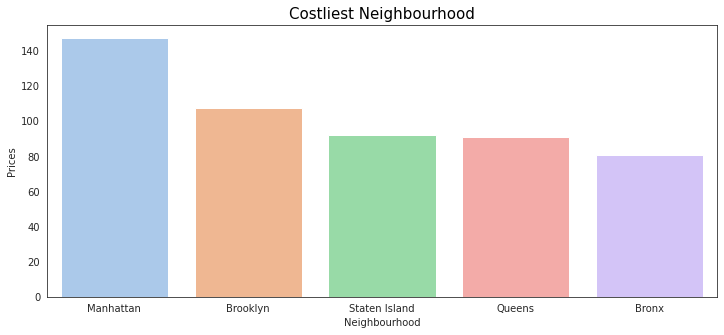

In [64]:
# Costliest Neighbourhood(Barplot)
plt.figure(figsize=(12,5))
sns.barplot(data=prices_in_neighbourhood_group,x='neighbourhood_group',y='price',palette='pastel')
plt.title("Costliest Neighbourhood",fontsize=15, fontweight=0, color='black', loc='center', style='normal')
plt.xlabel("Neighbourhood")
plt.ylabel("Prices")
plt.show

▶ New York City's Manhattan borough is the most expensive neighborhood.

### **Price Vs Room Type**

<function matplotlib.pyplot.show(*args, **kw)>

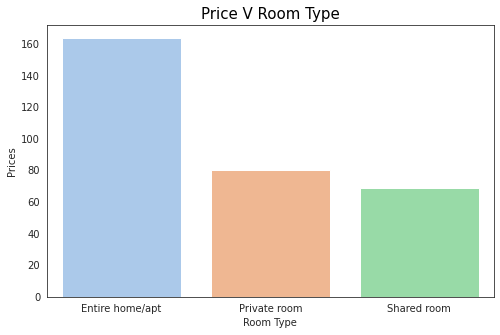

In [65]:
# Price V Room Type
plt.figure(figsize=(8,5))
room_type_prices = airbnb_df_updated_price.groupby("room_type")["price"].mean().reset_index().sort_values(by='price',ascending=False)
sns.barplot(data=room_type_prices,x='room_type',y='price',palette='pastel')
plt.title("Price V Room Type",fontsize=15, fontweight=0, color='black', loc='center', style='normal')
plt.xlabel("Room Type")
plt.ylabel("Prices")
plt.show

▶ "Entire home/apt" listings are more expensive than the other two room types.

### **Neighbourhood Group vs Number of Reviews**

In [66]:
number_of_reviews_in_neighbourhood_group = airbnb_df.groupby(['neighbourhood_group'])['number_of_reviews'].sum().reset_index()
number_of_reviews_in_neighbourhood_group

neighbourhood_group  number_of_reviews
0               Bronx              28371
1            Brooklyn             486574
2           Manhattan             454569
3              Queens             156950
4       Staten Island              11541

<function matplotlib.pyplot.show(*args, **kw)>

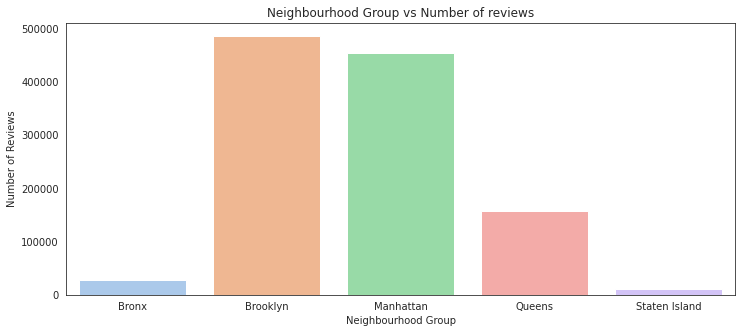

In [67]:
# Neighbourhood Group vs Number of reviews(Barplot)
plt.figure(figsize=(12,5))
sns.barplot(x='neighbourhood_group',y='number_of_reviews',data=number_of_reviews_in_neighbourhood_group,palette='pastel')
plt.title("Neighbourhood Group vs Number of reviews")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Number of Reviews")
plt.show

▶ Although number of listings are higher in ***Manhatten***, number of reviews are higher in ***Brooklyn***

▶ Which may be because of price difference between this two neighbourhood

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 1296x1296 with 0 Axes>

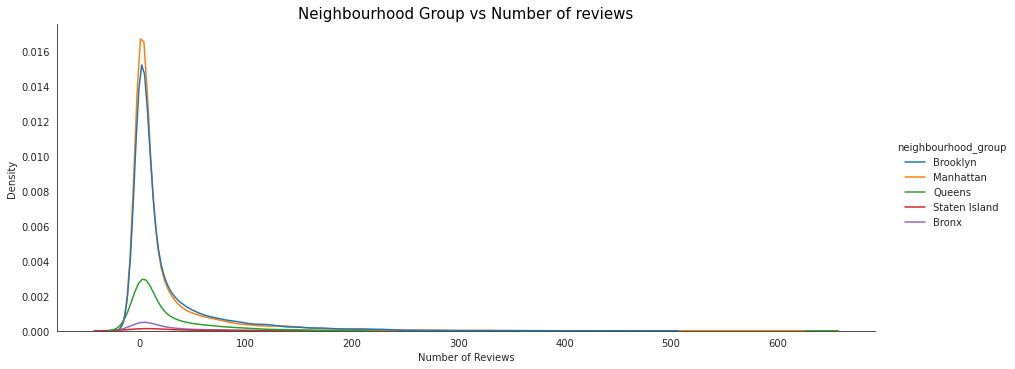

In [68]:
# Neighbourhood Group vs Number of reviews
plt.figure(figsize=(18,18))
sns.displot(data=airbnb_df_updated_price,x='number_of_reviews',hue="neighbourhood_group",kind='kde',warn_singular=False,height=5, aspect=2.5)
plt.title("Neighbourhood Group vs Number of reviews",fontsize=15, fontweight=0, color='black', loc='center', style='normal')
plt.xlabel("Number of Reviews")
plt.show

### **Price Vs Number Of Reviews**

<function matplotlib.pyplot.show(*args, **kw)>

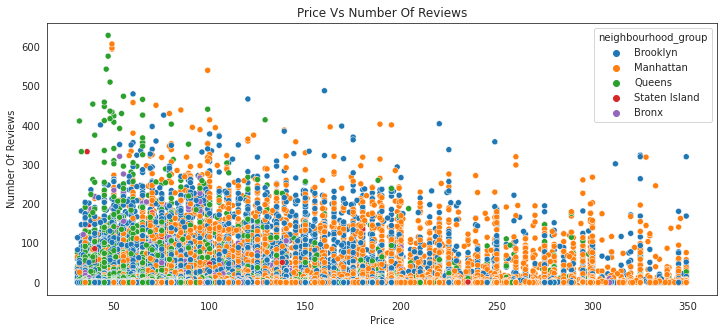

In [69]:
# Price Vs Number Of Reviews
plt.figure(figsize=(12,5))
sns.scatterplot(x='price',y='number_of_reviews',data=airbnb_df_updated_price,hue='neighbourhood_group')
plt.title("Price Vs Number Of Reviews")
plt.xlabel("Price")
plt.ylabel("Number Of Reviews")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 1080x360 with 0 Axes>

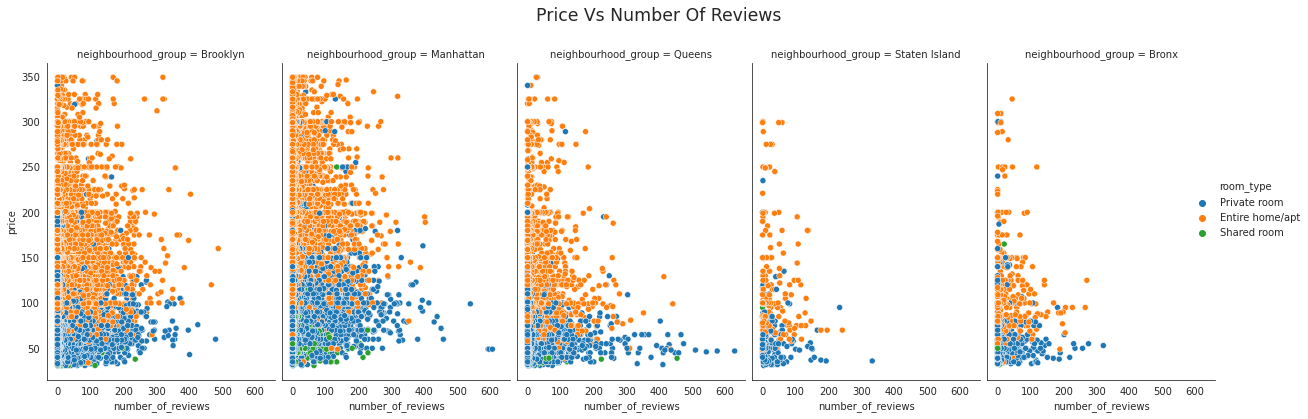

In [70]:
plt.figure(figsize=(15,5))
price_v_reviews = sns.relplot(data=airbnb_df_updated_price,
            x="number_of_reviews", 
            y="price", 
            hue="room_type", 
            col="neighbourhood_group")
price_v_reviews.fig.subplots_adjust(top=.85)
price_v_reviews.fig.suptitle('Price Vs Number Of Reviews',fontsize = 'xx-large',weight = 'medium')
price_v_reviews.fig.set_figwidth(18)
price_v_reviews.fig.set_figheight(6)

plt.show

▶ Number of reviews for "Shared Room" is almost none showing they are booked less frquently across all neighbourhod

▶ We can see slightly higher number of reviews for "Entire Home/Apt" in Brooklyn compared too Manhattan that maybe because of the expensive listings in Manhattan.

▶ Staten Island & Bronx have significantly lower count of number of reviews compared too other neighbourhooods

### **Minimum Nights**

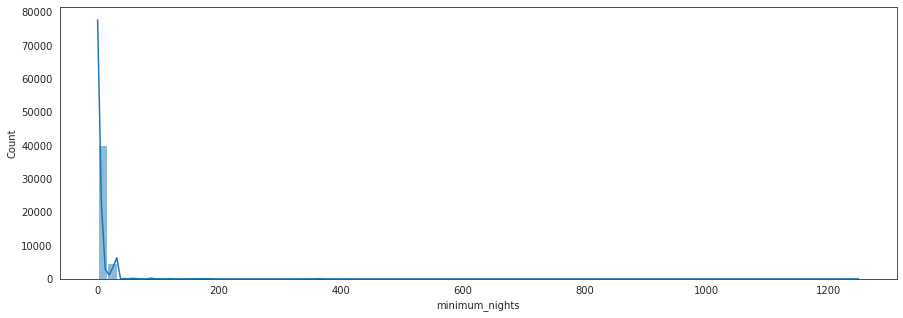

In [71]:
plt.figure(figsize=(15,5))
sns.histplot(data=airbnb_df_updated_price, x="minimum_nights", kde=True, bins = 80)

In [84]:
airbnb_df_updated_price.loc[(airbnb_df_updated_price.minimum_nights >30),"minimum_nights"]=30

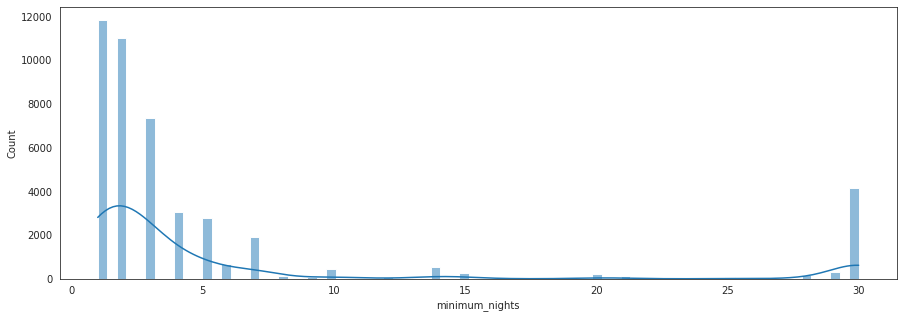

In [85]:
plt.figure(figsize=(15,5))
sns.histplot(data=airbnb_df_updated_price, x="minimum_nights", kde=True, bins = 80)


▶ The majority of listings have their minimum night record specified as being less than 10.

▶ Here, it's noteworthy that the listing frequency for the minimum night of 30 has peaked.

▶ This could be explained by the fact that some property owners have listed their properties as monthly rentals.

<function matplotlib.pyplot.show(*args, **kw)>

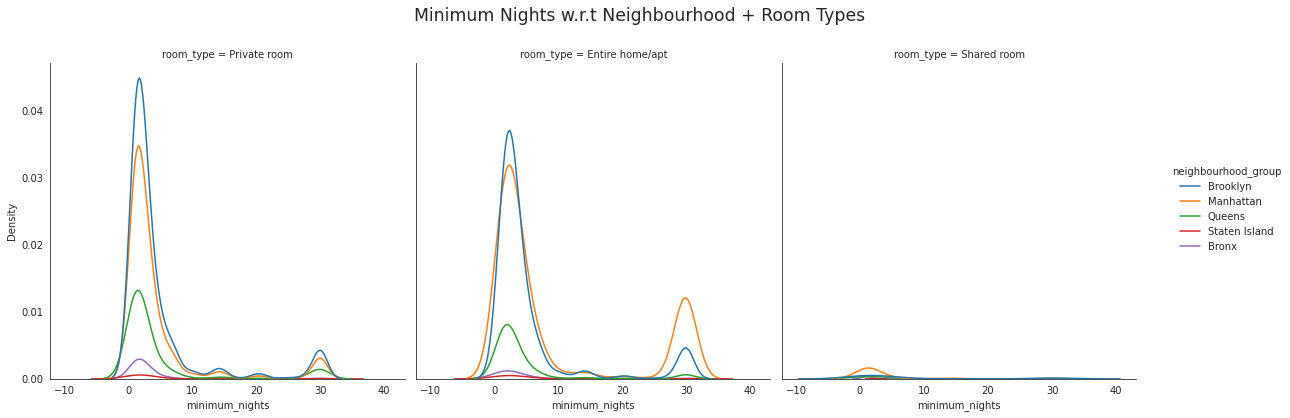

In [74]:
min_night = sns.displot(x='minimum_nights',
            data=airbnb_df_updated_price,
            col='room_type',
            hue='neighbourhood_group',
            kind='kde')
min_night.fig.subplots_adjust(top=.85)
min_night.fig.suptitle('Minimum Nights w.r.t Neighbourhood + Room Types',fontsize = 'xx-large',weight = 'medium')
min_night.fig.set_figwidth(18)
min_night.fig.set_figheight(6)
plt.show

▶ The majority of listings with minimum nights of 30 are of the room type **"Entire Home/Apt"**.

▶ The room type **"Entire Home/Apt"** appears to be the most common choice for listings with a minimum night requirement of 30, which makes sense.

### **Price Vs Reviews Per Month**

<function matplotlib.pyplot.show(*args, **kw)>

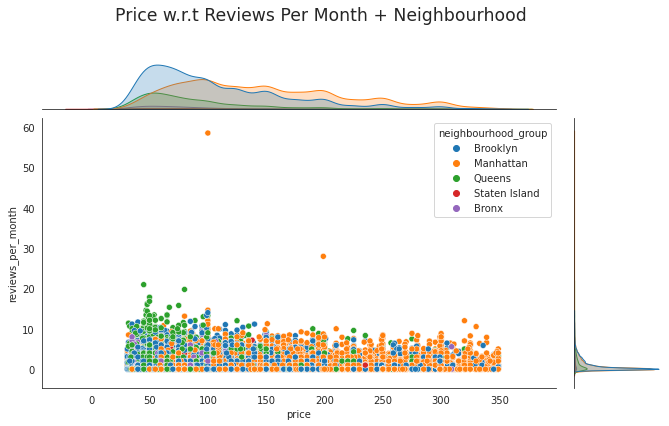

In [75]:
# Price Vs Reviews Per Month by Neighbourhood Group
price_v_revprmonth1 = sns.jointplot(data=airbnb_df_updated_price,
            y = 'reviews_per_month',
            x = "price",
            hue="neighbourhood_group")
price_v_revprmonth1.fig.subplots_adjust(top=.85)
price_v_revprmonth1.fig.suptitle('Price w.r.t Reviews Per Month + Neighbourhood',fontsize = 'xx-large',weight = 'medium')
price_v_revprmonth1.fig.set_figwidth(10)
price_v_revprmonth1.fig.set_figheight(6)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

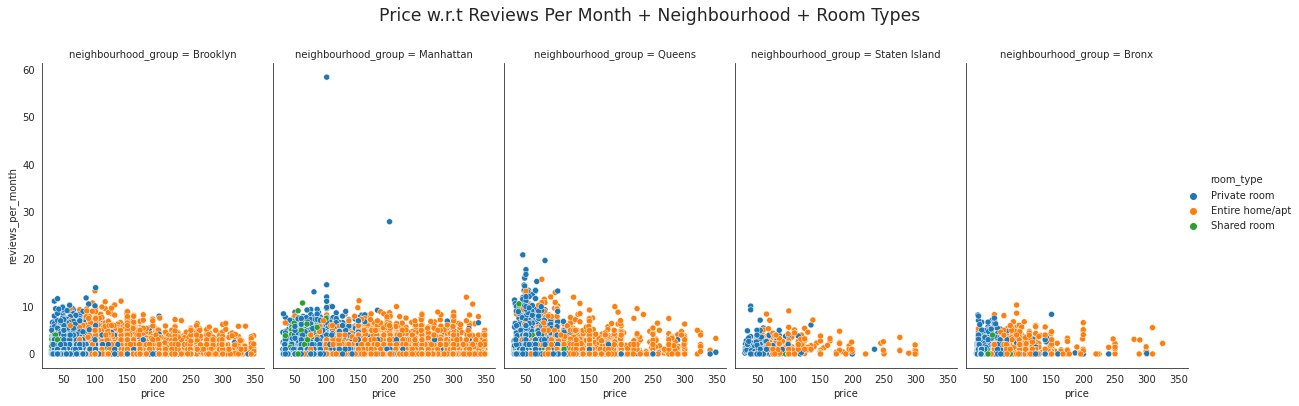

In [76]:
# Price Vs Reviews Per Month by Neighbourhood Group & Room Type
price_v_revpermonth = sns.relplot(data=airbnb_df_updated_price,
            y = 'reviews_per_month',
            x = "price",
            height=4,
            kind='scatter',
            hue = "room_type",
            col="neighbourhood_group")
price_v_revpermonth.fig.subplots_adjust(top=.85)
price_v_revpermonth.fig.suptitle('Price w.r.t Reviews Per Month + Neighbourhood + Room Types',fontsize = 'xx-large',weight = 'medium')
price_v_revpermonth.fig.set_figwidth(18)
price_v_revpermonth.fig.set_figheight(6)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 1080x864 with 0 Axes>

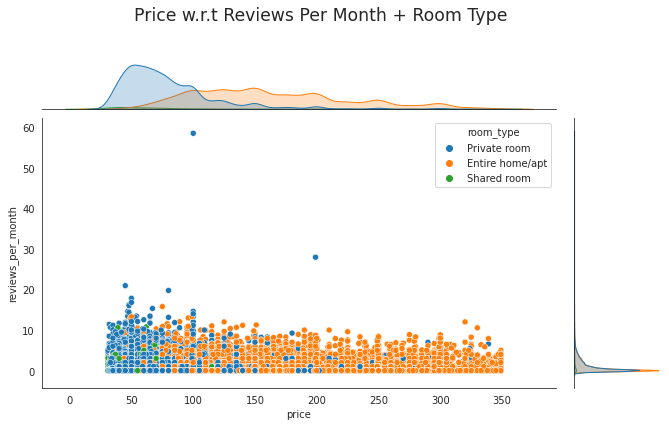

In [77]:
plt.figure(figsize=(15,12))
price_v_revprmonth2 = sns.jointplot(data=airbnb_df_updated_price,
            y = 'reviews_per_month',
            x = "price",
            hue="room_type")
price_v_revprmonth2.fig.subplots_adjust(top=.85)
price_v_revprmonth2.fig.suptitle('Price w.r.t Reviews Per Month + Room Type',fontsize = 'xx-large',weight = 'medium')
price_v_revprmonth2.fig.set_figwidth(10)
price_v_revprmonth2.fig.set_figheight(6)
plt.show

▶ There are **more review**s for the **less expensive listings** since they are rented out more frequently.

### **Location Vs Availability**

In [78]:
fig = px.scatter_mapbox(airbnb_df_updated_price,
                        lon=airbnb_df_updated_price['longitude'],
                        lat=airbnb_df_updated_price['latitude'],
                        size_max=25,
                        zoom=9.5,
                        color = airbnb_df_updated_price['availability_365'],
                        color_continuous_scale=px.colors.cyclical.IceFire,
                        hover_name="name",
                        width = 800, 
                        height = 600,
                        title = 'Availabilty')
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":10})
fig.show()

# **Conclusion**

* Manhattan is the busiest and and most well-liked neighbourhood group, 
followed by Brooklyn, in terms of listings and reviews.

* With an average price of \$145\, Manhattan is also the most expensive neighbourhood group, followed by Brooklyn at \$105\.

* After Williamsburg, Bedford-Stuyvesant is the neighbourhood with the second-highest popularity.

* The most often reserved room type is "private room," followed by "entire home/apt" 

* Given that they are booked more frequently, properties with lesser pricing get more reviews

* Prices for most properties range from \$50 to \$100.

* The majority of listings have a minimum night record of 10 or less, however there are also frequent listings with a minimum night record of 30.
This could be explained by the fact that some property owners have listed their properties as monthly rentals.

* The busiest host is Dona, who is followed by JJ.

* The most listings are available year-round in Staten Island and the Bronx.

* There are more than 37,000 hosts in New York City.